In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_csv('Zomato data .csv')

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Data Cleaning 
Convert the data types of column "rate" 

In [7]:
def handle_Rate(value):
    value= str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handle_Rate)


In [10]:
df.head

<bound method NDFrame.head of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2           

Check Null value

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of restaurant')

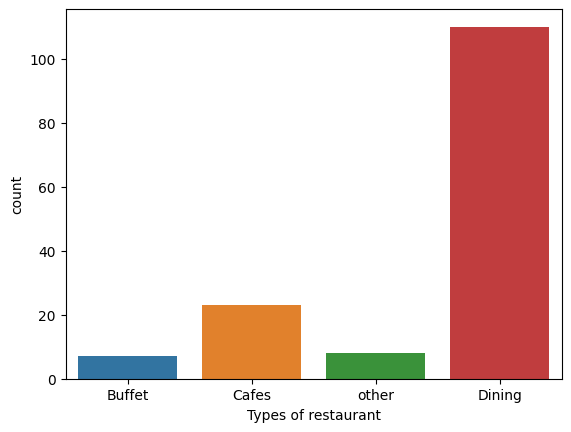

In [20]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of restaurant')

"The graph shows that the majority of customers place their orders at 'Dining' type restaurants, indicating that this restaurant type is the most popular among the customers."

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

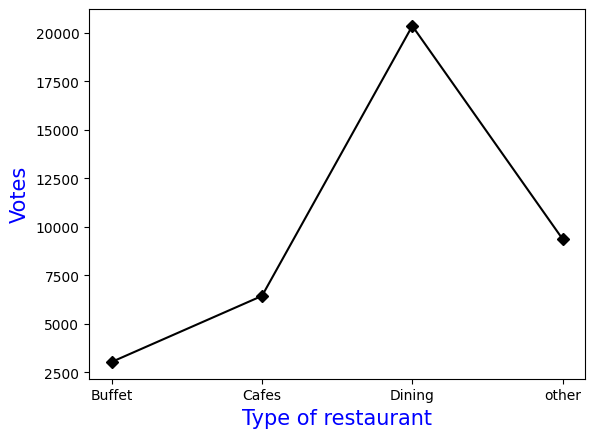

In [36]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='#000000', marker='D')
plt.xlabel("Type of restaurant", c='#0000FF', size=15)
plt.ylabel('Votes', c='#0000FF', size=15)


"The graph clearly shows that 'Dining' restaurants have received the maximum number of votes from customers, indicating their popularity compared to other types of restaurants." 

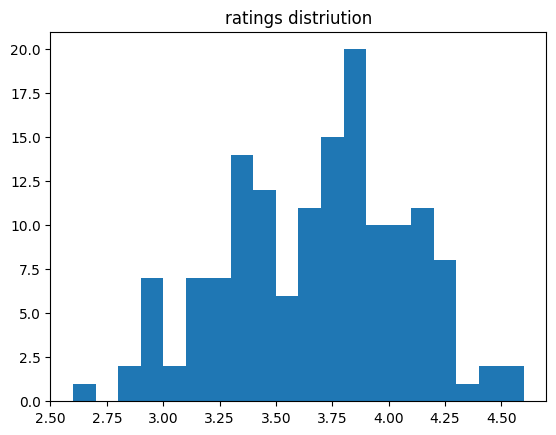

In [42]:
plt.hist(df['rate'],bins=20)
plt.title('ratings distriution')
plt.show()

"The histogram clearly shows that the majority of restaurants received ratings between 3.75 and 4.00."

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

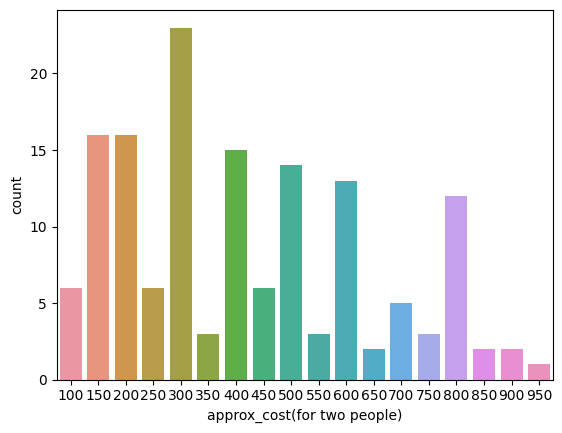

In [44]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

"The above graph clearly shows that the majority of couples prefer restaurants with an approximate cost of 300 rupees."

<Axes: xlabel='online_order', ylabel='rate'>

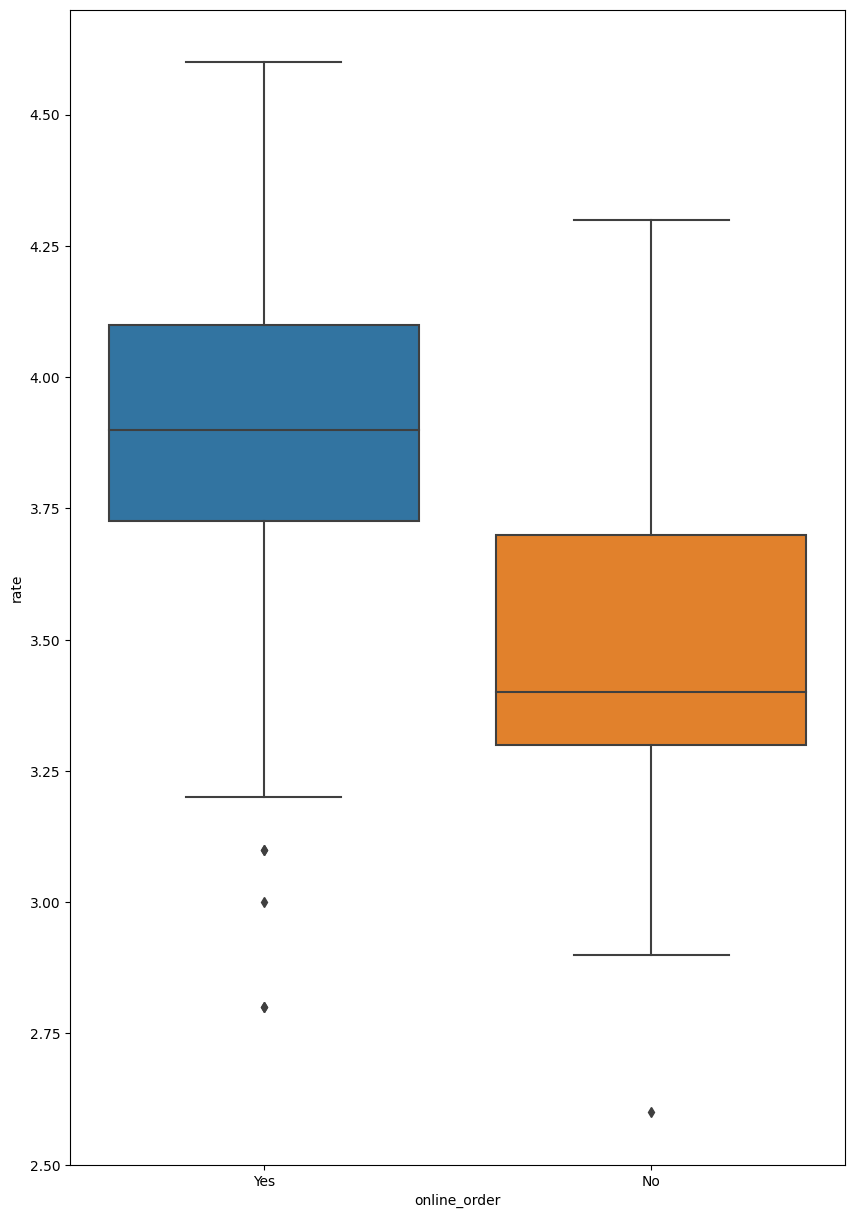

In [48]:
plt.figure(figsize=(10,15))
sns.boxplot(x='online_order', y = 'rate', data=df)

"The above box plot clearly shows that customers that ordered online received a maximum number of ratings compared to those that ordered offline."

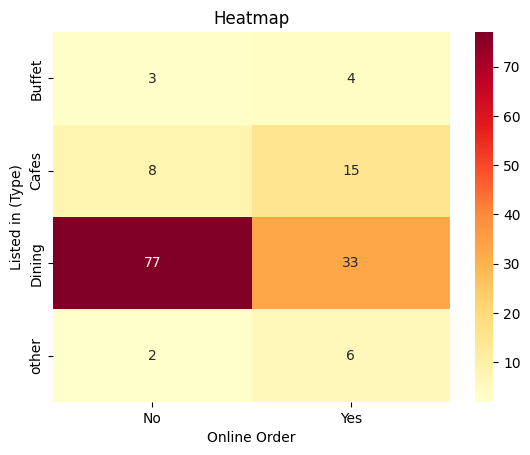

In [57]:
pivot_table=df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in (Type)')
plt.show()

"The heatmap clearly shows that 'Dining' restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but favor online ordering at cafes."